In [1]:
import pyulog
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
data_silv_r = pyulog.ULog("data/mereni_silvestr2021/silvestr_ref.ulg")
data_silv_m = pyulog.ULog("data/mereni_silvestr2021/silvestr.ulg")

data_nr_r = pyulog.ULog("data/mereni_silvestr2021/novorocni_ohnostroj_ref.ulg")
data_nr_m = pyulog.ULog("data/mereni_silvestr2021/novorocni_ohnostroj_mes.ulg")

In [3]:
#print(set([print(x.name) for x in data_silv_r.data_list]))

In [4]:
def gen_df(data, fields):
    tables = []
    for field in fields:
        pr = field+'/'
        d = pd.DataFrame(data.get_dataset(field).data).set_index('timestamp').sort_index()
        d = d.add_prefix(pr).rename(columns={pr+'timestamp':'timestamp'})
        tables.append(d)
    
    return pd.concat(tables, sort=True).sort_index().interpolate(method="linear")

silv_mes = gen_df(data_silv_m, ['sensor_airborne_particles', 'vehicle_local_position', 'vehicle_global_position', 'wind', 'airspeed'])
silv_ref = gen_df(data_silv_r, ['sensor_airborne_particles', 'vehicle_local_position', 'vehicle_global_position', 'wind', 'airspeed'])
nr_mes = gen_df(data_nr_m, ['sensor_airborne_particles', 'vehicle_local_position', 'vehicle_global_position', 'wind', 'airspeed'])
nr_ref = gen_df(data_nr_r, ['sensor_airborne_particles', 'vehicle_local_position', 'vehicle_global_position', 'wind', 'airspeed'])


for ds in [silv_mes, silv_ref, nr_mes, nr_ref]:
    ds['vehicle_local_position/z'] *= -1
    ds['wind_spd'] = np.sqrt(ds['wind/windspeed_north']**2 + ds['wind/windspeed_east']**2)


mes = silv_mes
ref = silv_ref
    
#mes['vehicle_local_position/z'] *= -1
#ref['vehicle_local_position/z'] *= -1


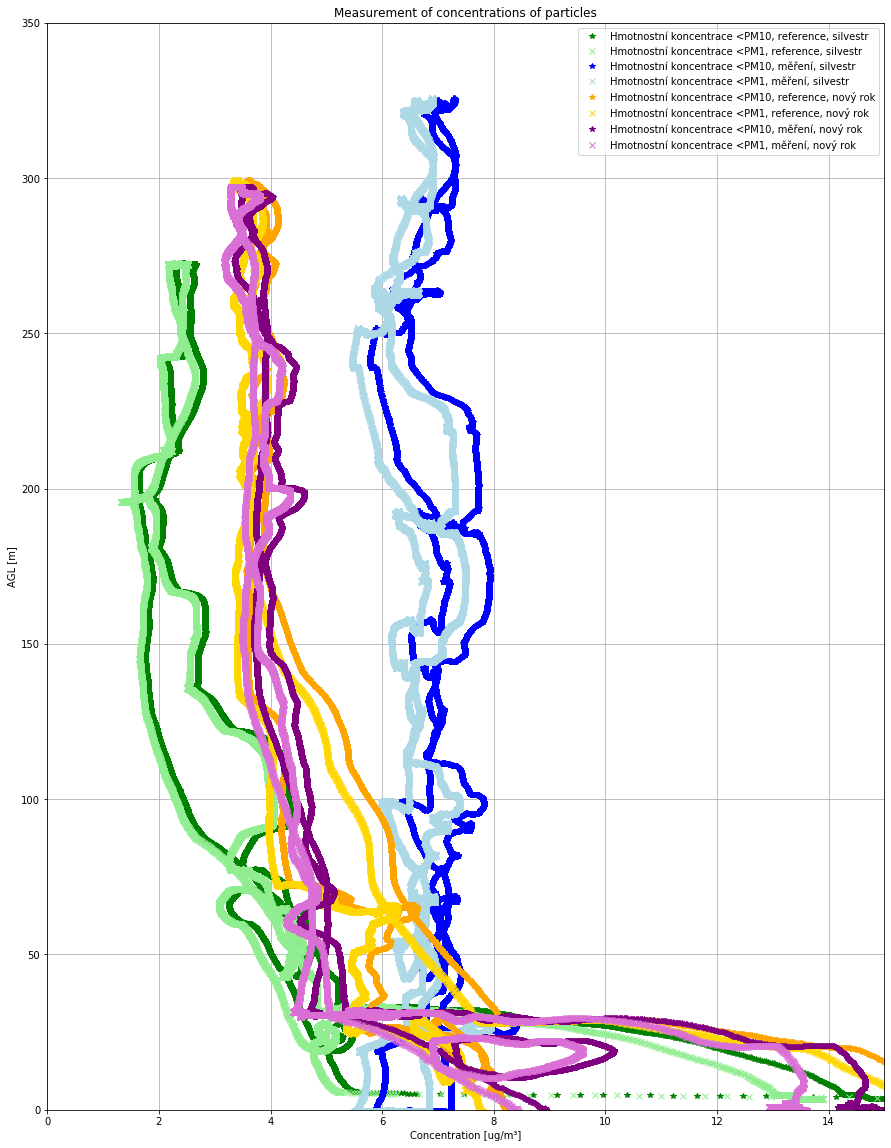

In [11]:
plt.figure(figsize=(15, 20))

plt.plot(silv_ref['sensor_airborne_particles/mass_concentration_pm10_0'], silv_ref['vehicle_local_position/z'], color="green", marker="*", ls='', label="Hmotnostní koncentrace <PM10, reference, silvestr")
plt.plot(silv_ref['sensor_airborne_particles/mass_concentration_pm1_0'], silv_ref['vehicle_local_position/z'], color="lightgreen", marker="x", ls='', label="Hmotnostní koncentrace <PM1, reference, silvestr")
plt.plot(silv_mes['sensor_airborne_particles/mass_concentration_pm10_0'], silv_mes['vehicle_local_position/z'], color="blue", marker="*", ls='', label="Hmotnostní koncentrace <PM10, měření, silvestr")
plt.plot(silv_mes['sensor_airborne_particles/mass_concentration_pm1_0'], silv_mes['vehicle_local_position/z'], color="lightblue", marker="x", ls='', label="Hmotnostní koncentrace <PM1, měření, silvestr")

plt.plot(nr_ref['sensor_airborne_particles/mass_concentration_pm10_0'], nr_ref['vehicle_local_position/z'], color="orange", marker="*", ls='', label="Hmotnostní koncentrace <PM10, reference, nový rok")
plt.plot(nr_ref['sensor_airborne_particles/mass_concentration_pm1_0'], nr_ref['vehicle_local_position/z'], color="gold", marker="x", ls='', label="Hmotnostní koncentrace <PM1, reference, nový rok")
plt.plot(nr_mes['sensor_airborne_particles/mass_concentration_pm10_0'], nr_mes['vehicle_local_position/z'], color="purple", marker="*", ls='', label="Hmotnostní koncentrace <PM10, měření, nový rok")
plt.plot(nr_mes['sensor_airborne_particles/mass_concentration_pm1_0'], nr_mes['vehicle_local_position/z'], color="orchid", marker="x", ls='', label="Hmotnostní koncentrace <PM1, měření, nový rok")


plt.ylabel("AGL [m]")
plt.xlabel("Concentration [ug/m³]")
plt.xlim(0,15)
plt.ylim(0, 350)
plt.title("Measurement of concentrations of particles")
plt.grid()
plt.legend()

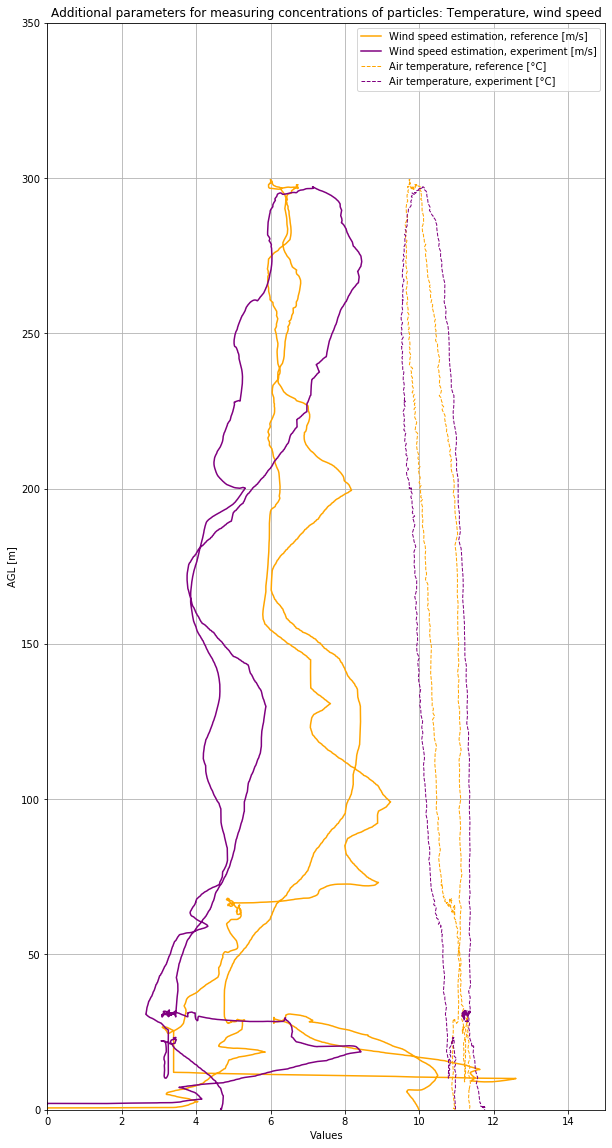

In [14]:
plt.figure(figsize=(10, 20))

if 0:
    plt.plot(silv_ref['wind_spd'], silv_ref['vehicle_local_position/z'], color="green", ls='-', label="Wind speed estimation, reference [m/s]")
    plt.plot(silv_mes['wind_spd'], silv_mes['vehicle_local_position/z'], color="blue", ls='-', label="Wind speed estimation, experiment [m/s]")
    plt.plot(silv_ref['airspeed/air_temperature_celsius'], silv_ref['vehicle_local_position/z'], color="green", ls='--', lw=1, label="Air temperature, reference [°C]")
    plt.plot(silv_mes['airspeed/air_temperature_celsius'], silv_mes['vehicle_local_position/z'], color="blue", ls='--', lw=1, label="Air temperature, experiment [°C]")

if 1:
    plt.plot(nr_ref['wind_spd'], nr_ref['vehicle_local_position/z'], color="orange", ls='-', label="Wind speed estimation, reference [m/s]")
    plt.plot(nr_mes['wind_spd'], nr_mes['vehicle_local_position/z'], color="purple", ls='-', label="Wind speed estimation, experiment [m/s]")
    plt.plot(nr_ref['airspeed/air_temperature_celsius'], nr_ref['vehicle_local_position/z'], color="orange", ls='--', lw=1, label="Air temperature, reference [°C]")
    plt.plot(nr_mes['airspeed/air_temperature_celsius'], nr_mes['vehicle_local_position/z'], color="purple", ls='--', lw=1, label="Air temperature, experiment [°C]")


plt.ylabel("AGL [m]")
plt.xlabel("Values")
plt.xlim(0,15)
plt.ylim(0, 350)
plt.title("Additional parameters for measuring concentrations of particles: Temperature, wind speed")
plt.grid()
plt.legend()

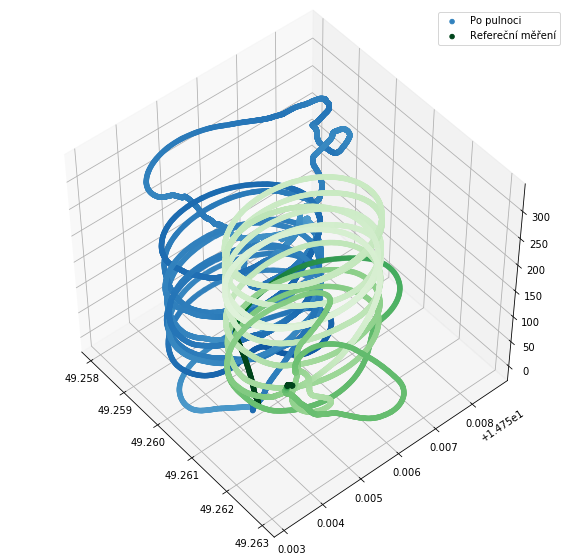

In [7]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(mes['vehicle_global_position/lat'], mes['vehicle_global_position/lon'], mes['vehicle_local_position/z'], c=mes['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Blues', vmin=0, vmax=10, label="Po pulnoci")
ax.scatter3D(ref['vehicle_global_position/lat'], ref['vehicle_global_position/lon'], ref['vehicle_local_position/z'], c=ref['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Greens', vmin=0, vmax=10, label="Refereční měření")
ax.view_init(50, -40)
plt.legend()
plt.grid()

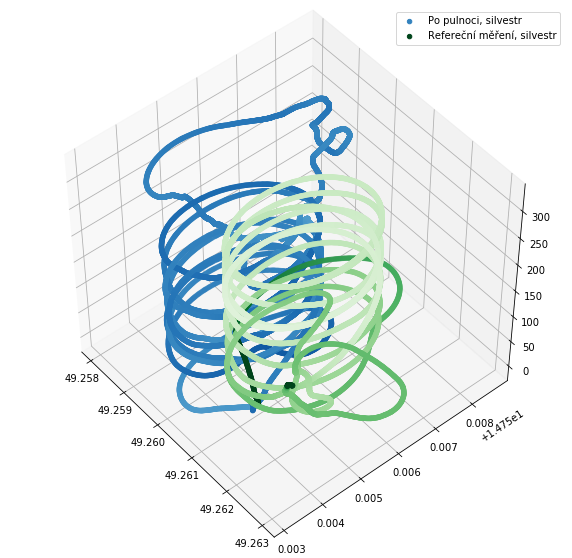

In [8]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(silv_mes['vehicle_global_position/lat'], silv_mes['vehicle_global_position/lon'], silv_mes['vehicle_local_position/z'], c=silv_mes['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Blues', vmin=0, vmax=10, label="Po pulnoci, silvestr")
ax.scatter3D(silv_ref['vehicle_global_position/lat'], silv_ref['vehicle_global_position/lon'], silv_ref['vehicle_local_position/z'], c=silv_ref['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Greens', vmin=0, vmax=10, label="Refereční měření, silvestr")
ax.view_init(50, -40)
plt.legend()
plt.grid()

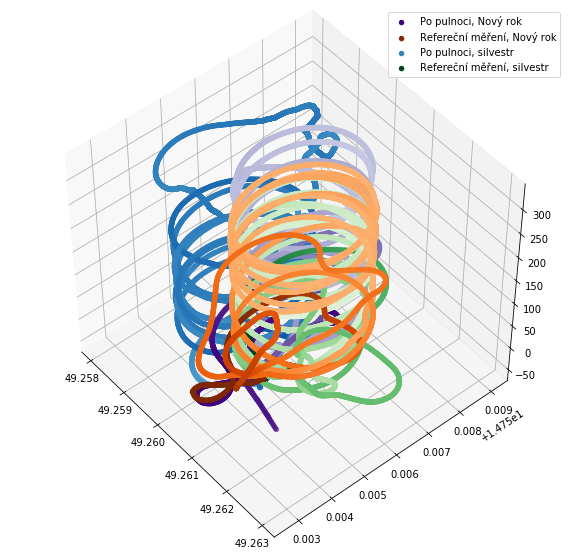

In [9]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(nr_mes['vehicle_global_position/lat'], nr_mes['vehicle_global_position/lon'], nr_mes['vehicle_local_position/z'], c=nr_mes['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Purples', vmin=0, vmax=10, label="Po pulnoci, Nový rok")
ax.scatter3D(nr_ref['vehicle_global_position/lat'], nr_ref['vehicle_global_position/lon'], nr_ref['vehicle_local_position/z'], c=nr_ref['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Oranges', vmin=0, vmax=10, label="Refereční měření, Nový rok")
ax.scatter3D(silv_mes['vehicle_global_position/lat'], silv_mes['vehicle_global_position/lon'], silv_mes['vehicle_local_position/z'], c=silv_mes['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Blues', vmin=0, vmax=10, label="Po pulnoci, silvestr")
ax.scatter3D(silv_ref['vehicle_global_position/lat'], silv_ref['vehicle_global_position/lon'], silv_ref['vehicle_local_position/z'], c=silv_ref['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Greens', vmin=0, vmax=10, label="Refereční měření, silvestr")
ax.view_init(50, -40)
plt.legend()
plt.grid()

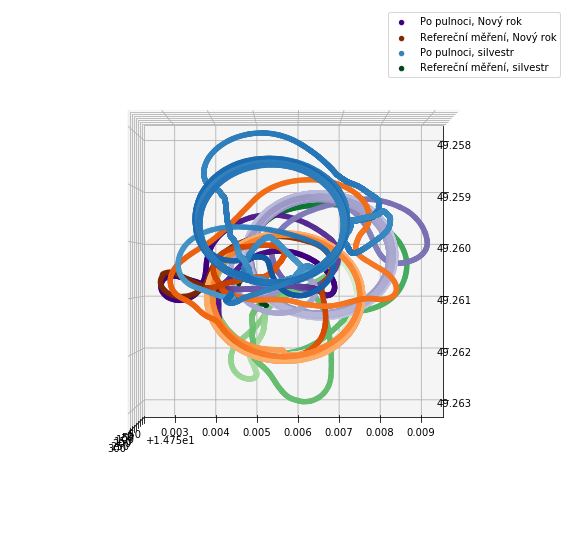

In [10]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(nr_mes['vehicle_global_position/lat'], nr_mes['vehicle_global_position/lon'], nr_mes['vehicle_local_position/z'], c=nr_mes['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Purples', vmin=0, vmax=10, label="Po pulnoci, Nový rok")
ax.scatter3D(nr_ref['vehicle_global_position/lat'], nr_ref['vehicle_global_position/lon'], nr_ref['vehicle_local_position/z'], c=nr_ref['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Oranges', vmin=0, vmax=10, label="Refereční měření, Nový rok")
ax.scatter3D(silv_mes['vehicle_global_position/lat'], silv_mes['vehicle_global_position/lon'], silv_mes['vehicle_local_position/z'], c=silv_mes['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Blues', vmin=0, vmax=10, label="Po pulnoci, silvestr")
ax.scatter3D(silv_ref['vehicle_global_position/lat'], silv_ref['vehicle_global_position/lon'], silv_ref['vehicle_local_position/z'], c=silv_ref['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Greens', vmin=0, vmax=10, label="Refereční měření, silvestr")
ax.view_init(90, 0)
plt.legend()
plt.grid()